# Classification of Fetal Health Data
#### Introduction to Machine Learning: Supervised Learning

#### Problem Statement

This project endeavors to apply machine learning algorithms to a dataset of fetal health data to determine whether a given pregnancy should be classified as Normal, Suspect, or Pathological.  The data for this study was derived from Cardiotocograms, a simple and inexpensive method of accessing fetal health measures, such as heart rate and fetal movement.  This classification problem is important because of the elevated rates of child mortality in many parts of the world.  If one can easily identify whether certain Cardiotocogram data indicates an unhealthy fetus, then one can intervene quickly to treat the underlying illnesses and increase the chances of a healthy delivery.  For the purposes of this project the K-Nearest Neighbors, Random Forest Algorithm,  Support Vector Machines, and Gradient Boosting algorithms will be used and compared for error, precision, recall, and AUC.

#### Data
The data for this project was first published in 2000 as part of the paper *SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms*, and it is freely available through the UCI Machine Learning Repository.  

> **Diogo Ayres-de-Campos et al. (2000) Cardiotocography Data Set.  UCI Machine Learning Repository [https://archive.ics.uci.edu/ml/datasets/cardiotocography]. Irvine, CA: University of California, School of Information and Computer Science.**

#### Feature Information
The data is composed of 2,126 objects with 40 features.  The target value for the this project will be the Fetal State Class Code.  The following features (cardiotocogram readings) will be retained for the purposes of this machine learning project, while the others will be removed, for purposes outlined below.

LB - Baseline (beats per minute)<br>
AC - Number of accelerations per second<br>
FM - Number of fetal movements per second<br>
UC - Number of uterine contractions per second<br>
DL - Number of light decelerations per second<br>
DS - Number of severe decelerations per second<br>
DP - Number of prolongued decelerations per second<br>
ASTV - Percentage of time with abnormal short term variability<br>
mSTV - Mean value of short term variability<br>
ALTV - Percentage of time with abnormal long term variability<br>
mLTV - Mean value of long term variability<br>
Width - Width of FHR histogram<br>
Min - Minimum of FHR histogram<br>
Max - Maximum of FHR histogram<br>
Nmax - Number of histogram peaks<br>
Nzeros - Number of histogram zeros<br>
Mode - Histogram mode<br>
Mean - Histogram mean<br>
Median - Histogram median<br>
Variance - Histogram variance<br>
Tendency - Histogram tendency<br>
NSP - Fetal state class code (Normal=1; Suspect=2; Pathologic=3)

In [486]:
import numpy as np 
import pandas as pd 
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

In [377]:
df = pd.read_csv('Cardiotocography_Data_Set.csv')  

In [378]:
pd.set_option('display.max_columns', None)
df.head()

FileName       Date      SegFile    b     e  LBE   LB  AC  FM  UC  \
0  Variab10.txt  12/1/1996  CTG0001.txt  240   357  120  120   0   0   0   
1    Fmcs_1.txt   5/3/1996  CTG0002.txt    5   632  132  132   4   0   4   
2    Fmcs_1.txt   5/3/1996  CTG0003.txt  177   779  133  133   2   0   5   
3    Fmcs_1.txt   5/3/1996  CTG0004.txt  411  1192  134  134   2   0   6   
4    Fmcs_1.txt   5/3/1996  CTG0005.txt  533  1147  132  132   4   0   5   

   ASTV  MSTV  ALTV  MLTV  DL  DS  DP  DR  Width  Min  Max  Nmax  Nzeros  \
0    73   0.5    43   2.4   0   0   0   0     64   62  126     2       0   
1    17   2.1     0  10.4   2   0   0   0    130   68  198     6       1   
2    16   2.1     0  13.4   2   0   0   0    130   68  198     5       1   
3    16   2.4     0  23.0   2   0   0   0    117   53  170    11       0   
4    16   2.4     0  19.9   0   0   0   0    117   53  170     9       0   

   Mode  Mean  Median  Variance  Tendency  A  B  C  D  E  AD  DE  LD  FS  \
0   120   137     121        73         1  0  0  0  0  0   0   0   0   1   
1   141   136     140        12         0  0  0  0  0  0   1   0   0   0   
2   141   135     138        13         0  0  0  0  0  0   1   0   0   0   
3   137   134     137        13         1  0  0  0  0  0   1   0   0   0   
4   137   136     138        11         1  0  1  0  0  0   0   0   0   0   

   SUSP  CLASS  NSP  
0     0      9    2  
1     0      6    1  
2     0      6    1  
3     0      6    1  
4     0      2    1

## Data Cleaning

FileName, Date, SegFile, b, and e will all be removed because they are essentially metadata.  Dates and filenames will not be relevant to a machine learning algorithm.  Features b (begin) and e (end) will be removed because these are indicators of the start and end time of the examination, which will not be helpful to retain as training data.  <br>
<br>
A number of additional features will also be removed as they are measures that were recorded by medical experts to determine the true fetal health values.  Since these are summarized in NSP, the fetal state class code, they will be removed. This project is only interested in classifying fetal health based on the cardiotocogram.
<br><br>
A - Calm sleep<br>
B - REM Sleep<br>
C - Calm Vigilance<br>
D - Active Vigilance<br>
SH - Shift Pattern<br>
AD - Accelerative/decelerative pattern<br>
DE - Decelerative pattern<br>
LD - Largely decelerative pattern<br>
FS - Flat-sinusoidal pattern<br>
SUSP - Suspect pattern<br>
Class - Class code <br>
<br>




In [379]:
df = df.drop(['FileName','Date','SegFile','b','e','LBE','A','B','C','D','E','AD','DE','LD','FS','DR','SUSP','CLASS'],axis=1)

In [380]:
df.head()

LB  AC  FM  UC  ASTV  MSTV  ALTV  MLTV  DL  DS  DP  Width  Min  Max  Nmax  \
0  120   0   0   0    73   0.5    43   2.4   0   0   0     64   62  126     2   
1  132   4   0   4    17   2.1     0  10.4   2   0   0    130   68  198     6   
2  133   2   0   5    16   2.1     0  13.4   2   0   0    130   68  198     5   
3  134   2   0   6    16   2.4     0  23.0   2   0   0    117   53  170    11   
4  132   4   0   5    16   2.4     0  19.9   0   0   0    117   53  170     9   

   Nzeros  Mode  Mean  Median  Variance  Tendency  NSP  
0       0   120   137     121        73         1    2  
1       1   141   136     140        12         0    1  
2       1   141   135     138        13         0    1  
3       0   137   134     137        13         1    1  
4       0   137   136     138        11         1    1

There are no Null or NaN values in the dataset, so it will not be necessary to impute any values.  

In [381]:
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
NSP         0
dtype: int64

In [382]:
df.isna().sum()

LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
NSP         0
dtype: int64

## Data Properties
Most of the features are composed of integer values; however, MSTV and MLTV are floating point values.  NSP, though an integer value, should be considered a categorical value.      


In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   int64  
 2   FM        2126 non-null   int64  
 3   UC        2126 non-null   int64  
 4   ASTV      2126 non-null   int64  
 5   MSTV      2126 non-null   float64
 6   ALTV      2126 non-null   int64  
 7   MLTV      2126 non-null   float64
 8   DL        2126 non-null   int64  
 9   DS        2126 non-null   int64  
 10  DP        2126 non-null   int64  
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int6

Based on the **Statistical Description** of the dataset, the tendency feature has a minimum value of -1.  This appears to be anamolous.  However, since I do not have enough domain knowledge, I will keep the negative values.  If the machine learning algorithm has trouble modeling the data, I will come back an remove these values.

In [384]:
df.describe()

LB           AC           FM           UC         ASTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.303857     2.722484     7.241298     3.659925    46.990122   
std       9.840844     3.560850    37.125309     2.847094    17.192814   
min     106.000000     0.000000     0.000000     0.000000    12.000000   
25%     126.000000     0.000000     0.000000     1.000000    32.000000   
50%     133.000000     1.000000     0.000000     3.000000    49.000000   
75%     140.000000     4.000000     2.000000     5.000000    61.000000   
max     160.000000    26.000000   564.000000    23.000000    87.000000   

              MSTV        ALTV         MLTV           DL           DS  \
count  2126.000000  2126.00000  2126.000000  2126.000000  2126.000000   
mean      1.332785     9.84666     8.187629     1.570085     0.003293   
std       0.883241    18.39688     5.628247     2.499229     0.057300   
min       0.200000     0.00000     0.000000     0.000000     0.000000   
25%       0.700000     0.00000     4.600000     0.000000     0.000000   
50%       1.200000     0.00000     7.400000     0.000000     0.000000   
75%       1.700000    11.00000    10.800000     3.000000     0.000000   
max       7.000000    91.00000    50.700000    16.000000     1.000000   

                DP        Width          Min          Max         Nmax  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.126058    70.445908    93.579492   164.025400     4.068203   
std       0.464361    38.955693    29.560212    17.944183     2.949386   
min       0.000000     3.000000    50.000000   122.000000     0.000000   
25%       0.000000    37.000000    67.000000   152.000000     2.000000   
50%       0.000000    67.500000    93.000000   162.000000     3.000000   
75%       0.000000   100.000000   120.000000   174.000000     6.000000   
max       4.000000   180.000000   159.000000   238.000000    18.000000   

            Nzeros         Mode         Mean       Median     Variance  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.323612   137.452023   134.610536   138.090310    18.808090   
std       0.706059    16.381289    15.593596    14.466589    28.977636   
min       0.000000    60.000000    73.000000    77.000000     0.000000   
25%       0.000000   129.000000   125.000000   129.000000     2.000000   
50%       0.000000   139.000000   136.000000   139.000000     7.000000   
75%       0.000000   148.000000   145.000000   148.000000    24.000000   
max      10.000000   187.000000   182.000000   186.000000   269.000000   

          Tendency          NSP  
count  2126.000000  2126.000000  
mean      0.320320     1.304327  
std       0.610829     0.614377  
min      -1.000000     1.000000  
25%       0.000000     1.000000  
50%       0.000000     1.000000  
75%       1.000000     1.000000  
max       1.000000     3.000000

The data is not generally balanced; however, this is to be expected since we are looking for pathology.  Most values will indicate healthy pregnancies.  However, skewed values may be indicators of something that is wrong.  Therefore, we will not drop any values based on what appear to be outliers.  These are likely important data points for the training process.<br>

The target feature is also imbalanced.  For each of the machine learning algorithms I will attempt to train the model based on the existing data sampling as well as a selection that oversamples the minority values.  I am interested to see whether oversampling the minority classes can improve performance.

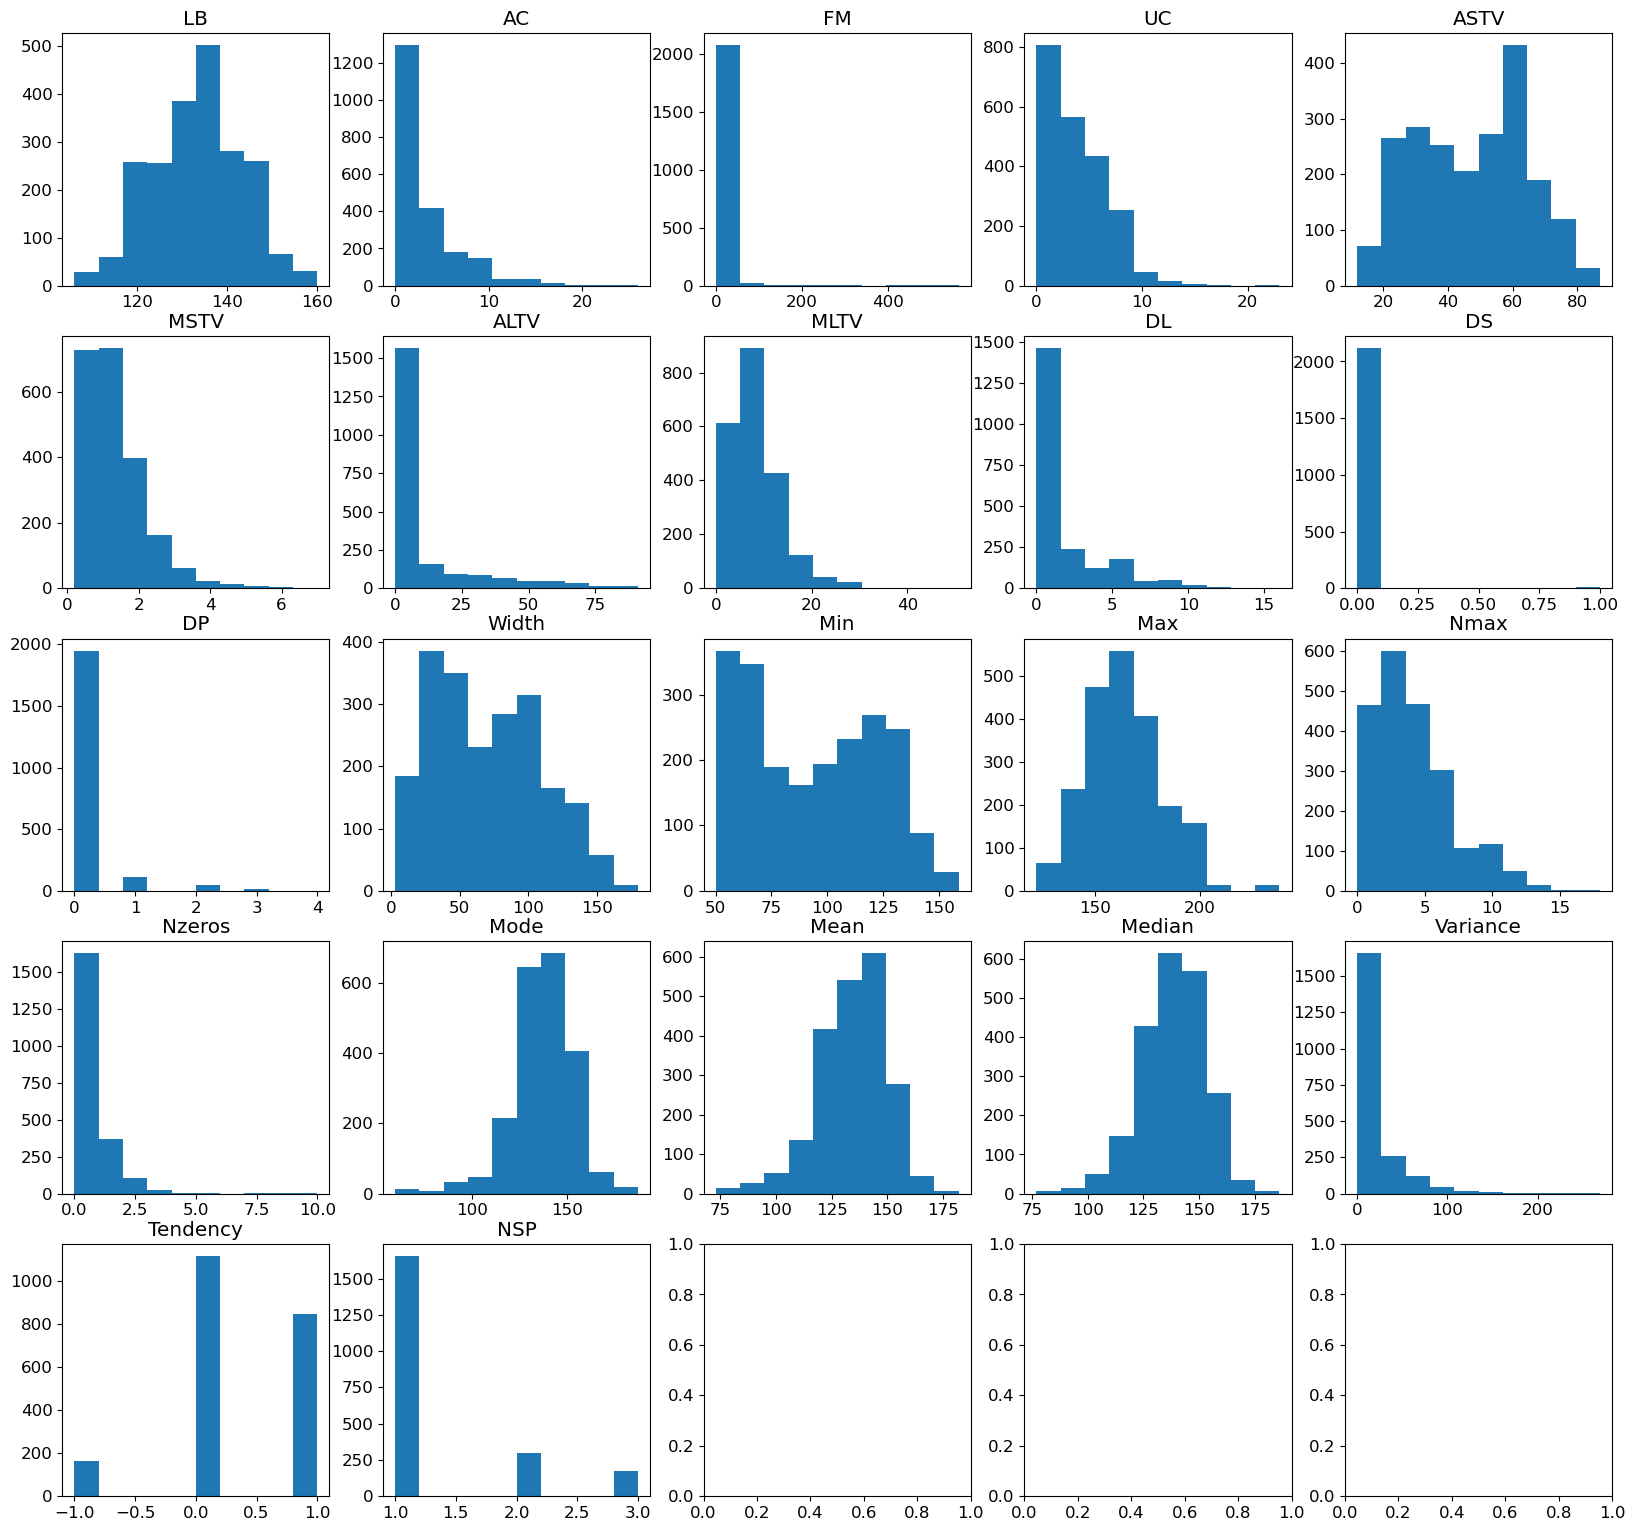

In [391]:
fig, axs = plt.subplots(5, 5, figsize=(20, 19))

col = 0
for feature in df.columns:
    for i in range(0,5):
        for j in range(0,5):
            if col <= 21:
                axs[i,j].hist(df.iloc[:, col], bins=10)
                axs[i,j].title.set_text(df.columns[col])
                col += 1

## Exploratory Data Analysis (EDA)

From the **Correlation Matrix**, it appears that ASTV (Percentage of time with abnormal short term variability), ALTV (Percentage of time with abnormal long term variability), and DP (Number of prolongued decelerations per second) are the most highly correlated values to NSP (Normal, Suspect, Pathologic).  DP is the most highly correlated with NSP, with an R-Squared of .49.  There also appears to be redundancy between the mode, median, and mean.  Gradient Boosting should be robust against any problems that this might cause.  Random forest should also be resilient in training with correlated values.  However, the feature importance analysis can be skewed since more than one variable can be credited with explaining the target variable.  Support Vector Machines is sensitive to collinearity, so it would be prudent to remove the highly correlated features in that case.

<AxesSubplot:>

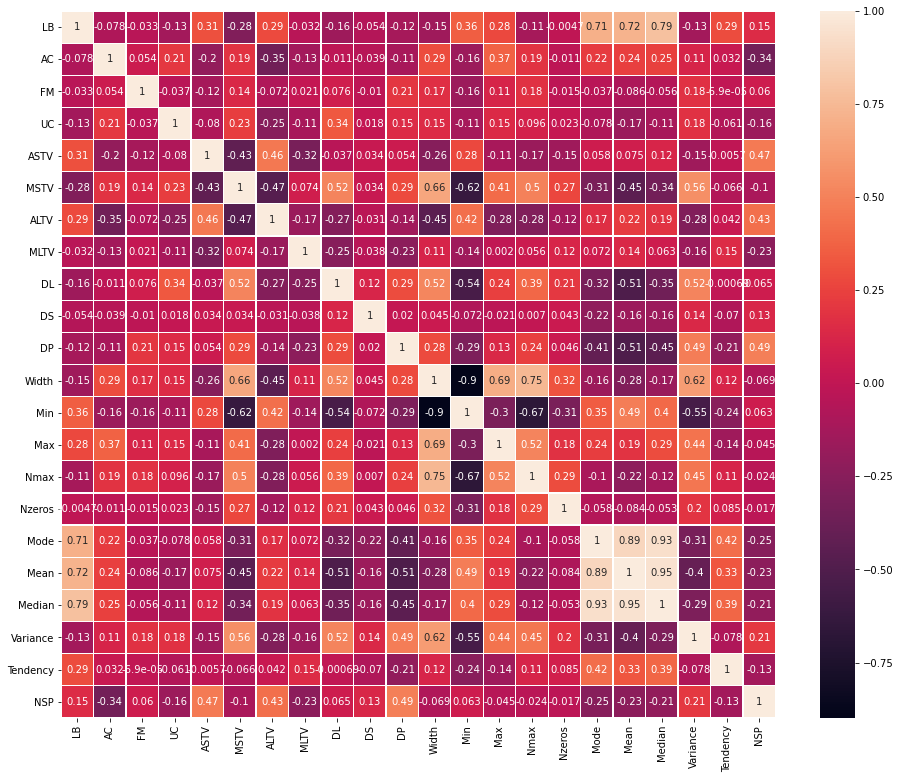

In [27]:
fig, ax = plt.subplots(figsize=(16, 13))

sns.heatmap(df.corr(), linewidths=.3, annot=True)

The following Pair Plot also illustrates the same trends.  The intersections of Mean, Median, and Mode are tightly packed, demonstrating a high correlation between the values.

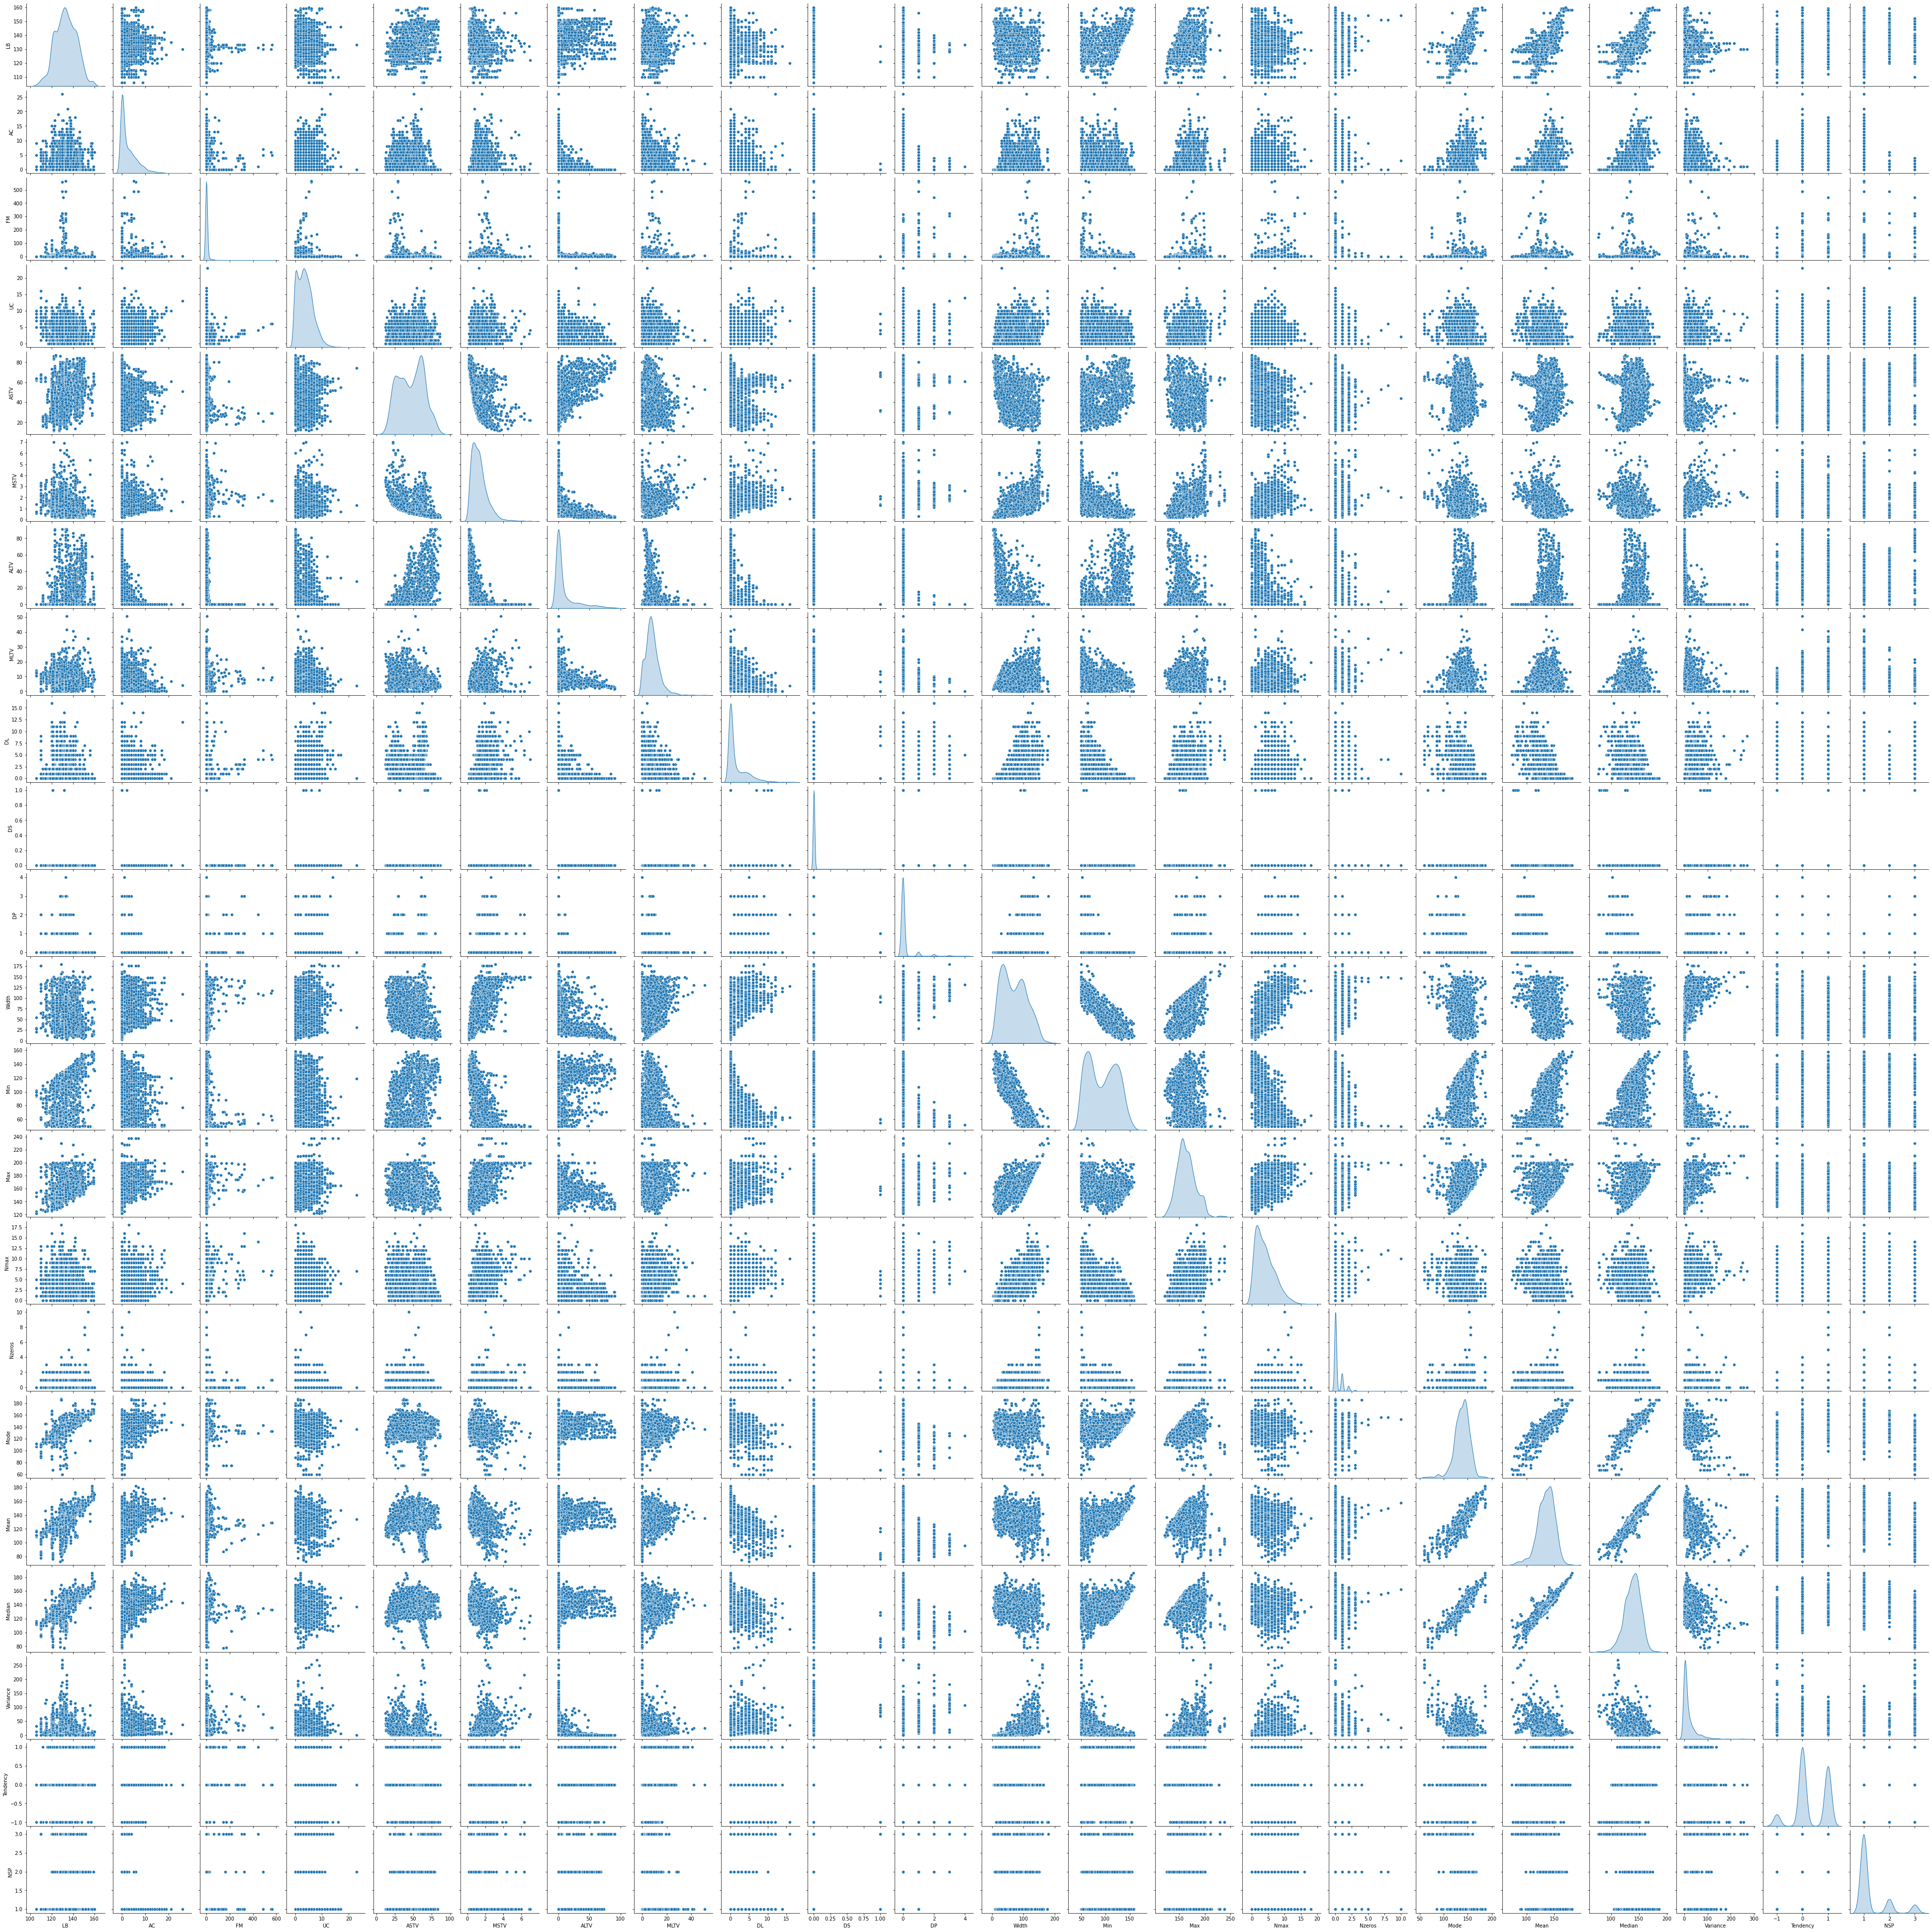

In [76]:
sns.pairplot(df,diag_kind='kde')

## Preparation For Modeling and Evaluation

To train the algorithms, I will split the data into train and test batches.  The test batch will be 25% of the data, which will allow for evaluation of the resulting models.  <br><br>
I will also create a second resampled version of the train and test data.  This training batch will oversample the minority classes to elimate imbalances between the classes in the training data.<br><br>
I have put together a few functions to evaluate each model.  The Score function will return the Precision, Recall, F-Score and Confusion Matrix.  The Roc_Curve function will generate One Versus the Rest ROC Curves along with the Area Under the Curve (AUC).  The Feature Importance function will plot that indicator.  <br><br>
These metrics have been chosen due to the imbalanced nature of the data.  Accuracy can be misleading in this case, because most correctly predicted values may be the dominant class.  The F-Score and Area Under the Curve provide a strong indication of performance with all three classes.


In [392]:
y = df['NSP']
X = df.drop(['NSP'],axis=1) 

In [393]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [394]:
oversample = RandomOverSampler(sampling_strategy='not majority', random_state=0)
X_resampled, y_resampled = oversample.fit_resample(X_train, y_train)

In [488]:
def score(y_test, y_pred):
    print("Precision: " + str(precision_score(y_test, y_pred, average='weighted')))
    print("Recall: " + str(recall_score(y_test, y_pred, average='weighted')))
    print("F Score: " + str(f1_score(y_test, y_pred, average='weighted')))
    print("Confusion Matrix: \n")
  

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.show()


In [396]:
# This code is based on examples found here: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

def roc_curve(y_train,X_test,y_test,clf):

    y_score = clf.predict_proba(X_test)
    
    label_binarizer = LabelBinarizer().fit(y_train)
    y_onehot_test = label_binarizer.transform(y_test)
    y_onehot_test.shape  

    fig, ax = plt.subplots(1,3,figsize=(15, 3), sharex=True, sharey=True)
    colors = ["tab:green", "tab:orange", "tab:blue"]
    for class_of_interest, color in zip(range(1,4), colors):

        class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
        RocCurveDisplay.from_predictions(
            y_onehot_test[:, class_id],
            y_score[:, class_id],
            name=f"{class_of_interest} vs the rest",
            color=color,
            ax=ax[class_of_interest-1]
        )
        ax[0].set_ylabel('True Positive Rate')
        ax[1].set_ylabel('True Positive Rate')
        ax[2].set_ylabel('True Positive Rate')
        ax[0].set_xlabel('False Positive Rate')
        ax[1].set_xlabel('False Positive Rate')
        ax[2].set_xlabel('False Positive Rate')

In [397]:
def feature_importance(x,y):

    f, ax = plt.subplots(figsize=(18,3)) 
    ax.set_title('Feature Importance')
    ax.set_xlabel('Feature')
    ax.set_ylabel('GINI Importance')
    plt.bar(x, y) 
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

## Modeling with K-Nearest Neighbors

K-Nearest Neighbors is a non-parametric ML algorithm.  Since it is looking for the closest distances to other data in the set, it can work well with multi-class data.  Since there are three possible classes in the Cardiotocography dataset, this might be a ideal candidate for classification.<br>

To find the best N-Neighbors parameter, I will conduct a grid search to iterate through a series of possible values using 3-fold cross validation.

In [399]:
knn = KNeighborsClassifier()

parameters = {'n_neighbors':[1,2,3,4,5,6,7]}
grid = GridSearchCV(knn, parameters, cv=3)

In [400]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7]})

Interestingly, the best parameter is 1.  It strikes me that the since there are so many values in the Normal (1) class, it might be picking up on that.  I fear that it will not perform well for the other two minority classes.

In [401]:
grid.best_params_

{'n_neighbors': 1}

In [402]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

In [492]:
y_pred = knn.predict(X_test)

Precision: 0.8918008704192915
Recall: 0.8909774436090225
F Score: 0.891340035859848
Confusion Matrix: 



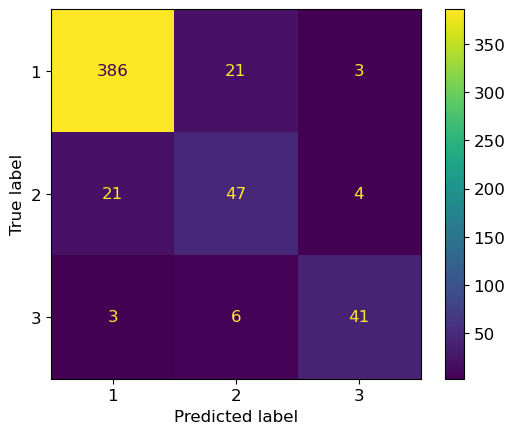

In [493]:
score(y_test, y_pred)

The f-Score for the model is strong; however, the confusion matrix shows that the algorithm does much better with classifying Normal values than Suspect values.  This is captured well in the ROC curves below.  The AUC for the Suspect class is only .80, compared to much high values for Normal and Suspect values.  However, the ROC Curve/AUC is not the best measure here.  Since Number of Neighbors is 1, the ROC curves are very rigid.  There is essentially just a binary probability in this case.  Greater values of Number of Neighbors would allow for a smoother graph.  

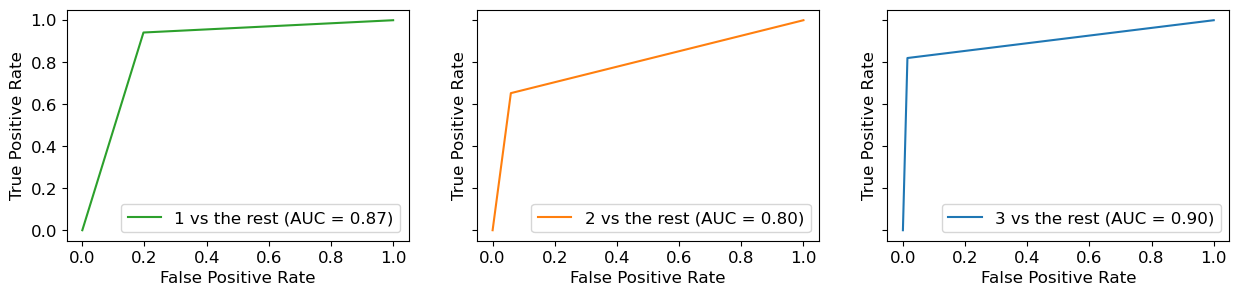

In [405]:
roc_curve(y_train,X_test,y_test,knn)

I will attempt another grid search to see if a different parameter value will result from a search through the resampled data.  The resampled data has equal quantities now in each target class.

In [409]:
y_resampled.groupby(y_resampled).count()

NSP
1    1245
2    1245
3    1245
Name: NSP, dtype: int64

In [410]:
knn_r = KNeighborsClassifier()

parameters = {'n_neighbors':[1,2,3,4,5,6,7]}
grid = GridSearchCV(knn_r, parameters, cv=3)

In [411]:
grid.fit(X_resampled, y_resampled)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7]})

In [408]:
grid.best_params_

{'n_neighbors': 1}

In [412]:
knn_r = KNeighborsClassifier(n_neighbors=2).fit(X_resampled, y_resampled)

In [494]:
y_pred = knn_r.predict(X_test)

Precision: 0.8918008704192915
Recall: 0.8909774436090225
F Score: 0.891340035859848
Confusion Matrix: 



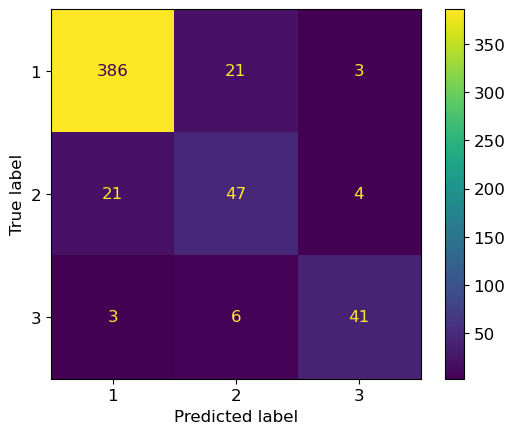

In [495]:
score(y_test, y_pred)

Disappointingly, the resampled data did not change the algorithm at all.  This is because the best parameter was again 1 for Number of Neighbors.  Therefore, it will still find the same value that is closest.  There will not be any change.

## Modeling With Random Forest Algorithm

Random Forest is an ensemble method that is based on the Decision Tree Classifier.  It uses both bagging and feature sampling to improve upon simple decision tree classification.  Decision Trees are inherently capable of handling multi-class classification problems.<br>

The Random Forest algorithm is susceptible to overfitting so I will use a grid search to find the optimal parameters for Max Depth and Number of Estimators.  We need to be caseful not to use too many estimators.

In [415]:
rf = RandomForestClassifier(class_weight='balanced', random_state=0)

parameters = {'max_depth':[1,2,3,4,5],'n_estimators':[50,100,150,200,250,300]}
grid = GridSearchCV(rf, parameters, cv=3)

In [416]:
grid.fit(X,y)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [50, 100, 150, 200, 250, 300]})

The grid search with three-fold cross validation shows that a Max Depth of 5 and 150 Estimators should be the best parameter values.   

In [417]:
grid.best_params_

{'max_depth': 5, 'n_estimators': 150}

In [418]:
rf = RandomForestClassifier(max_depth=5, n_estimators=150, class_weight='balanced', random_state=0).fit(X_train, y_train)

In [496]:
y_pred = rf.predict(X_test)

The Random Forest Estimator has a slightly better Precision of than KNN.  However, the f-Scores are essentially the same.  Since we are dealing with imbalanced data, the f-score is a better composite measure.   

Precision: 0.913231798904624
Recall: 0.8909774436090225
F Score: 0.8980887238265737
Confusion Matrix: 



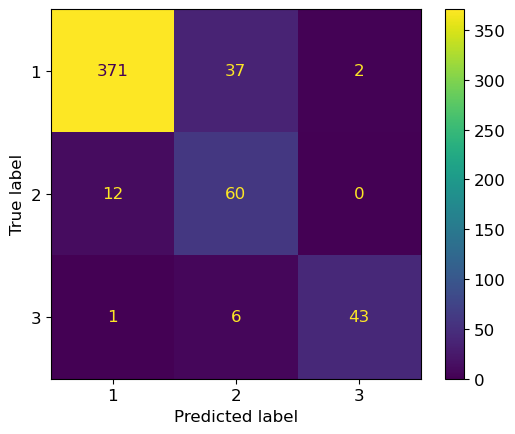

In [497]:
score(y_test, y_pred)

Interestingly, the confusion matrix shows that the Random Forest classifier is doing better than KNN in its prediction of Suspect pregnancies.  However, it has done poorly in predicting Normal pregnancies.  It has classified 37 Normal pregnancies as Suspect.  This means that there would be a higher rate of false positives (Suspect predictions) if this was used in real life.  The ROC Curve and AUC also show that this algorithm is performing better than KNN.  All three classes have an AUC greater than or equal to .95, with classification performance for Pathologic pregnancies at .99.

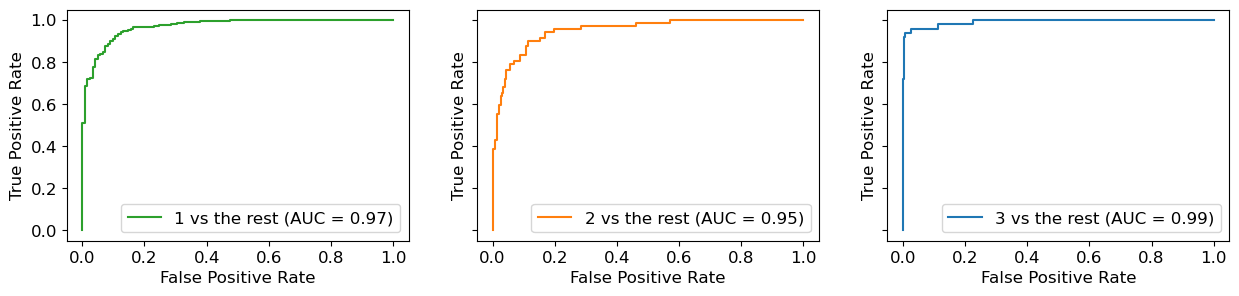

In [302]:
roc_curve(y_train,X_test,y_test,rf)

The **Feature Importance** for the Random Forest Algorithm shows that ASTV, ALTV, and the Mean where the most important features for analysis.  However, since Mode, Mean, and Median are all correlated, all three are likely similar in importance.

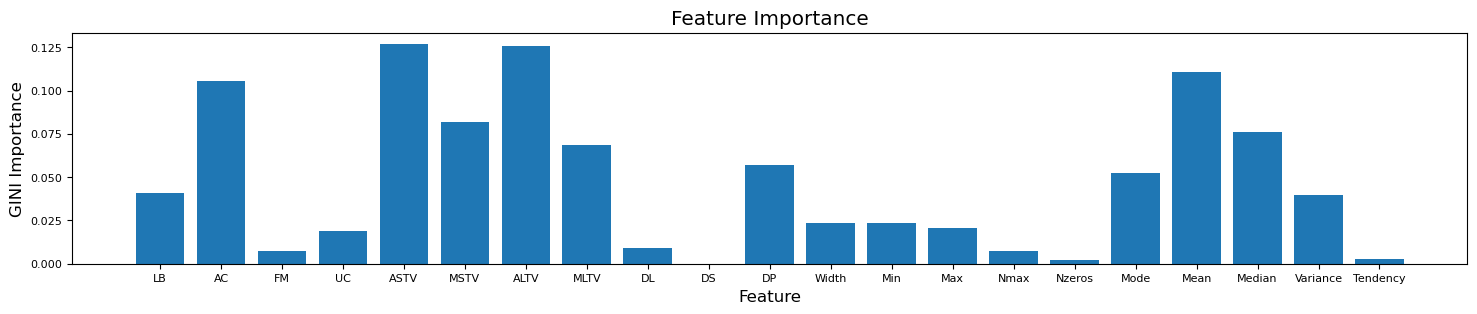

In [303]:
y = rf.feature_importances_
x = np.array(X.columns)

feature_importance(x,y)

Next I would like to see whether oversampling the minority target categories can help improve the performance.<br>

In [421]:
rf_r = RandomForestClassifier(max_depth=5, n_estimators=150, class_weight='balanced', random_state=0).fit(X_resampled, y_resampled)

In [498]:
y_pred = rf_r.predict(X_test)

Precision: 0.9175924296420139
Recall: 0.8966165413533834
F Score: 0.9032560769847336
Confusion Matrix: 



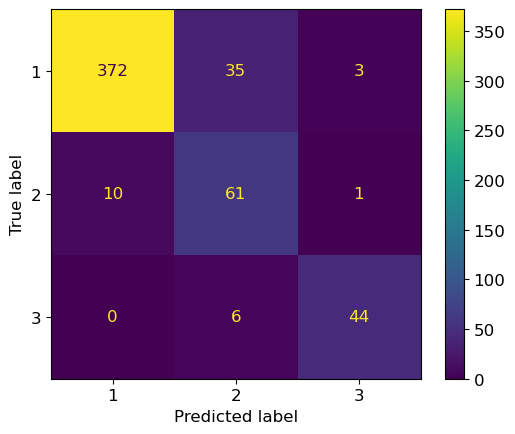

In [499]:
score(y_test, y_pred)

The confusion matrix shows that the f-score increased by about .01.  This is encouraging.  Most of the difference was with regards to predicting Suspect and Pathologic pregnancies better.  The ROC Curvesa and AUC are essentially the same.  


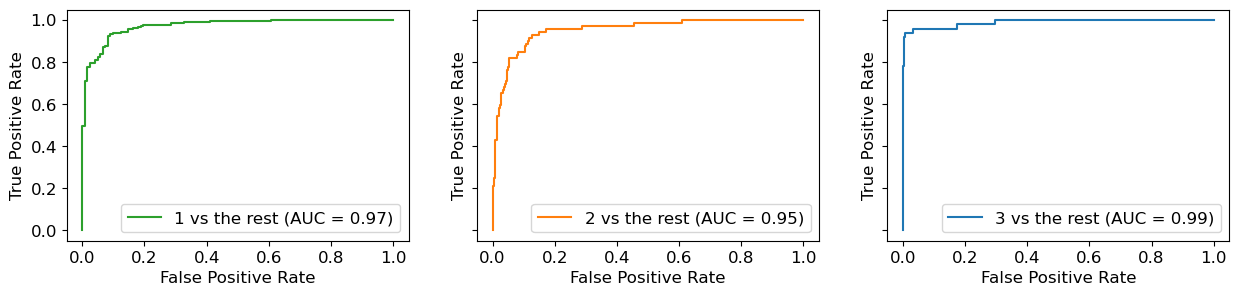

In [426]:
roc_curve(y_resampled,X_test,y_test,rf_r)

## Modeling with Support Vector Machines

Support Vector Machines function by seeking out the largest boundaries between the different classes of data.  Generally, the algorithm works with binary classification.  However, it can run a set of One-Versus-Rest iterations to accomplish multi-class classification.  Therefore, we will attempt to apply it to this multi-class problem.  SVMs are sensitive to collinearity; therefore, after training the model on the existing dataframe, I will attempt to remove some of the highly correlated features to see if any improvement can be made.
<br><br>
Since a number of different values for and C (the error budget for the soft margin) are possible, we will use a grid search to find the best combination of values.  The linear kernel will be employed for this project.

In [435]:
svc = SVC(kernel='linear')

parameters = {'C':[2**-5, 2**-4, 2**-3, 2**-2, 2**-1, 2**0, 2**1, 2**2, 2**3, 2**4, 2**5]}
grid= GridSearchCV(svc, parameters,cv=3)

In [436]:
grid.fit(X, y)

GridSearchCV(cv=3, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8,
                               16, 32]})

In [437]:
grid.best_params_

{'C': 0.03125}

In [438]:
svm = SVC(kernel='linear', C=0.03125, probability=True, random_state=0).fit(X_train,y_train)

In [500]:
y_pred = svm.predict(X_test)

Precision: 0.8948885827812971
Recall: 0.8947368421052632
F Score: 0.8943210216703853
Confusion Matrix: 



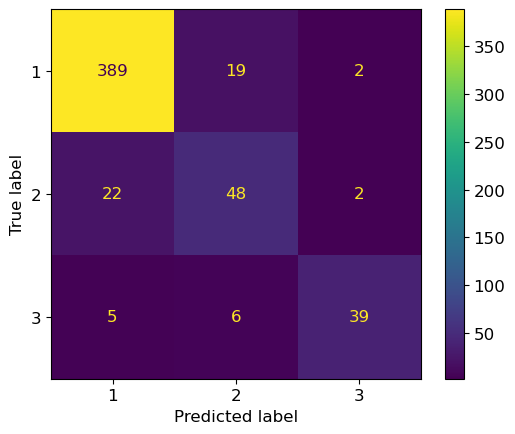

In [501]:
score(y_test, y_pred)

Based on this initial iteration of SVM, the f-score is similar to the previous two.  However, the confusion matrix and AUC scores show that this is performing worse than the Random Forest.  There almost twice as many Suspect values labelled as Normal than the Random Forest.  

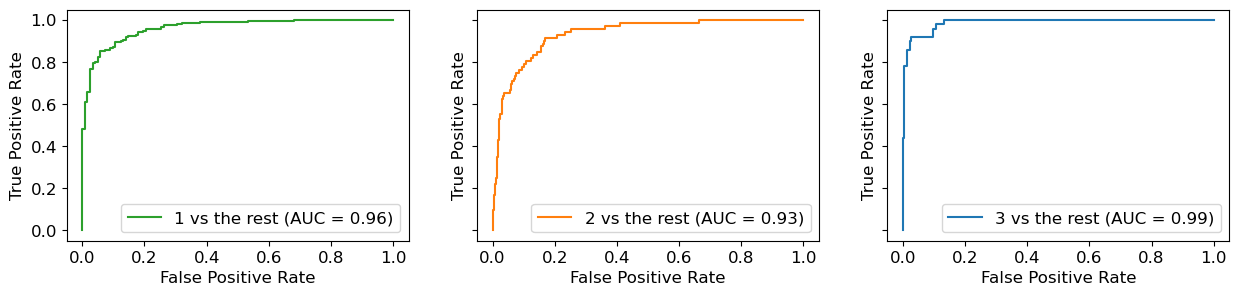

In [441]:
roc_curve(y_train,X_test,y_test,svm)

It appears from the coefficients, that DP (Number of prolongued decelerations per second) is having the greatest impact on the class boundary.

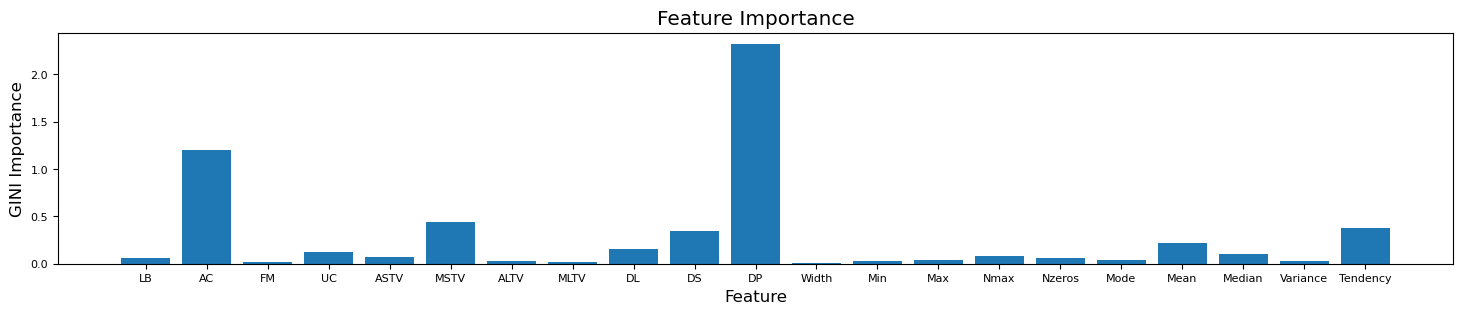

In [229]:
y = abs(clf.coef_[0])
x = np.array(X.columns)

feature_importance(x,y)

In [443]:
svm_r = SVC(kernel='linear', C=0.03125, probability=True, random_state=0).fit(X_resampled, y_resampled)

In [502]:
y_pred = svm_r.predict(X_test)

Precision: 0.8998645670801378
Recall: 0.8609022556390977
F Score: 0.8726092638508163
Confusion Matrix: 



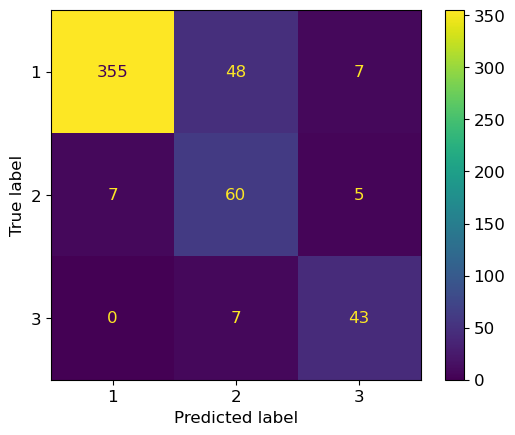

In [503]:
score(y_test, y_pred)

Using oversampled data actually decreased the performance, though the confusion matrix shows that it was better at labeling Suspect values.  

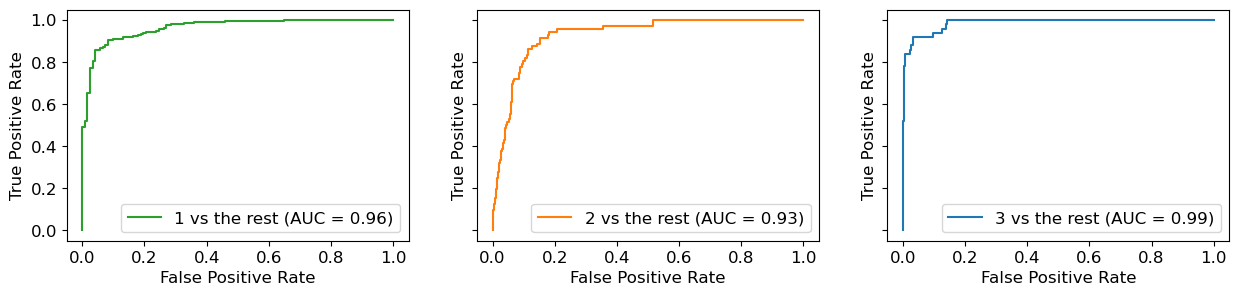

In [446]:
roc_curve(y_resampled,X_test,y_test,svm_r)

Lastly, I will try to drop some of the features that were highly correlated with others in the dataset.  SVM is susceptible to collinearity, so we will see if removing values can help boost the performance.

In [454]:
X_drop = X_train.drop(['Median','Mode','Min'], axis=1)
X_test_drop = X_test.drop(['Median','Mode','Min'], axis=1)

In [455]:
svm_d = SVC(kernel='linear', C=0.03125, probability=True, random_state=0).fit(X_drop, y_train) 

In [504]:
y_pred = svm_d.predict(X_test_drop)

Precision: 0.8862127970156516
Recall: 0.8853383458646616
F Score: 0.8854183043064635
Confusion Matrix: 



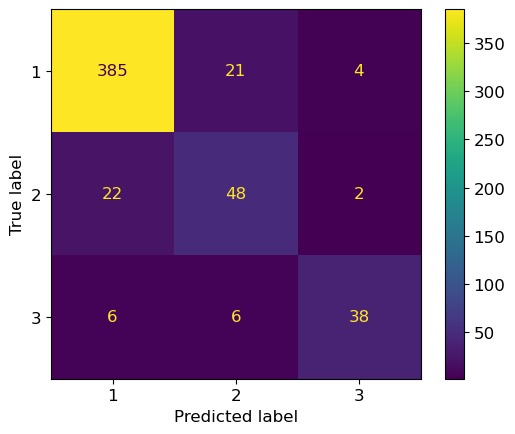

In [505]:
score(y_test, y_pred)

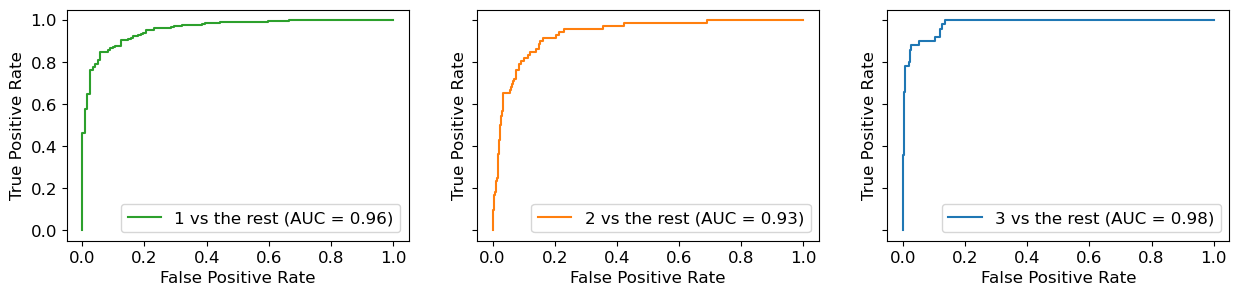

In [458]:
roc_curve(y_train,X_test_drop,y_test,svm_d)

The AUC measure suggest that this actually has the worst performance for the three SVM iterations.  However, the f-score is slightly higher than the resampled measure.

## Modeling with Gradient Boosting Algorithm

Gradient Boosting should be an efficient and effective algorithm for this problem.  It is generally robust against overfitting and collinearity.  However, it can be overly sensitive if the data is noisy.  I do not believe noisy data will be the case here as the data was compiled by experts in the field.  Generally it is a high performing algorithm, and many competitions are won using it.  <br>

Since Gradient Boosting is robust against overfitting, I will select the number of estimators to be 1000.  Then I will use a grid search to look for the best values for the other hyperparameters (learning rate and max depth).  The grid search will use three-fold cross validation.



In [459]:
gbc = GradientBoostingClassifier(n_estimators=1000)

parameters = {'max_depth':[1,2,3,4,5],'learning_rate':[.01,.05,1,1.5,2]}
grid= GridSearchCV(gbc, parameters,cv=3)

In [460]:
grid.fit(X,y)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(n_estimators=1000),
             param_grid={'learning_rate': [0.01, 0.05, 1, 1.5, 2],
                         'max_depth': [1, 2, 3, 4, 5]})

The best values for the hyperparameters are .01 for the learning rate and 2 for the max depth. I will then train the model on the data with the chosen hyper parameters.

In [461]:
grid.best_params_

{'learning_rate': 0.01, 'max_depth': 2}

In [471]:
gbc = GradientBoostingClassifier(n_estimators=1000, learning_rate=.01,max_depth=2, random_state=0).fit(X_train, y_train)

In [506]:
y_pred = gbc.predict(X_test)

The results are pretty spectacular.  Both Precision and Recall have scores of approximately 94%. 

Precision: 0.9440240949592822
Recall: 0.9454887218045113
F Score: 0.9442793302921698
Confusion Matrix: 



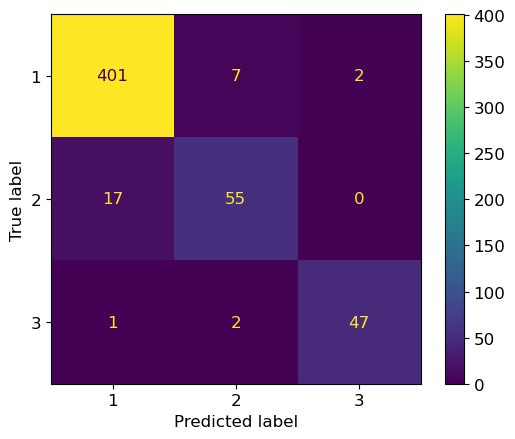

In [507]:
score(y_test, y_pred)

The confusion matrix shows that 17 Suspect pregnancies have been classified as Normal.  However, The AUC measures show that even 2 vs the Rest is .97.   

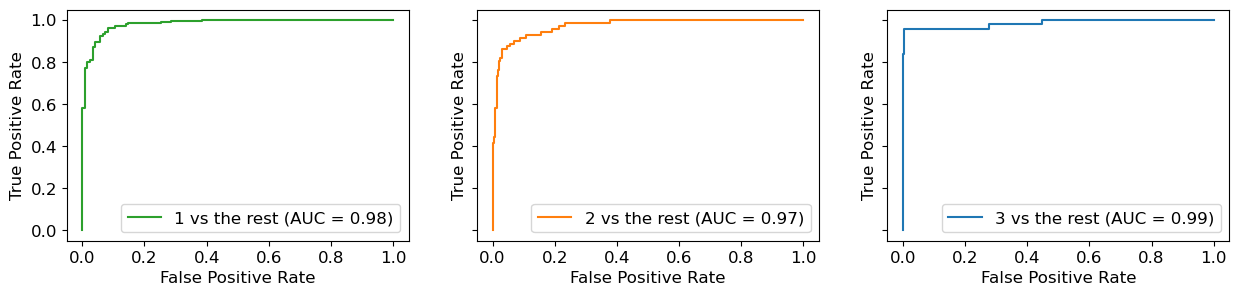

In [465]:
roc_curve(y_train,X_test,y_test,gbc)

Looking at the **Feature Importance** can help understand how much the Gradient Boosting algorithm is weighing certain features.  This demonstrates which features have the most influence on the model.  The following graph shows that ASTV (Percentage of time with abnormal short term variability) and ALTV (Percentage of time with abnormal long term variability) have the biggest impact.

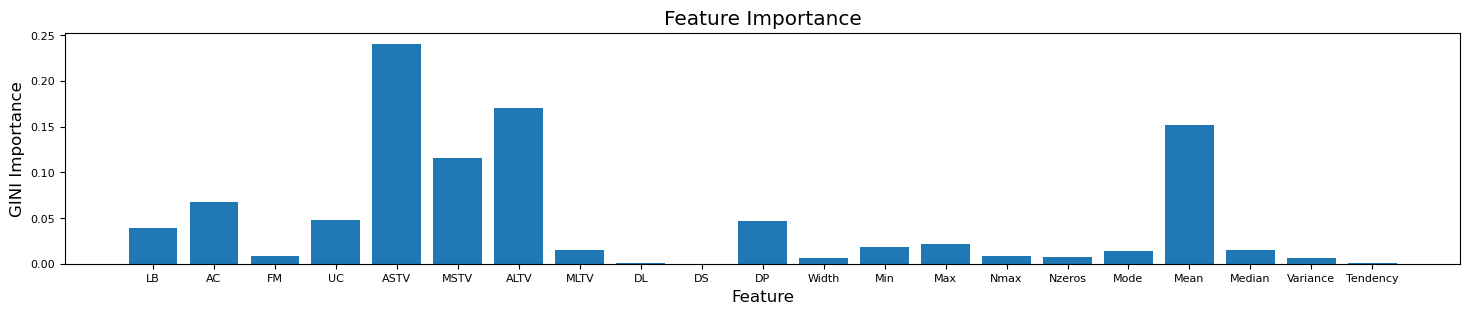

In [183]:
y = clf.feature_importances_
x = np.array(X.columns)

feature_importance(x,y)

In [474]:
gbc_r = GradientBoostingClassifier(n_estimators=1000, learning_rate=.01,max_depth=2, random_state=0).fit(X_resampled, y_resampled)

In [508]:
y_pred = gbc_r.predict(X_test)

Precision: 0.9260549947554388
Recall: 0.9135338345864662
F Score: 0.9173829249506563
Confusion Matrix: 



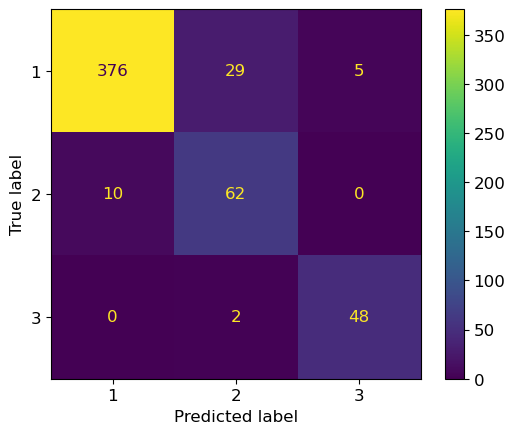

In [509]:
score(y_test, y_pred)

Unfortunately, oversampling the minority classes of the target did not improve the Precision or Recall of the model.  In fact these decreased by over .02.  Instead, the confusion matrix shows that 29 Normal pregnancies have now been labeled as Suspect whereas before there were only 7.  However, the number of Suspect pregnancies that were labeled as Normal has been cut in half to 10.  The AUC has decreased as well.

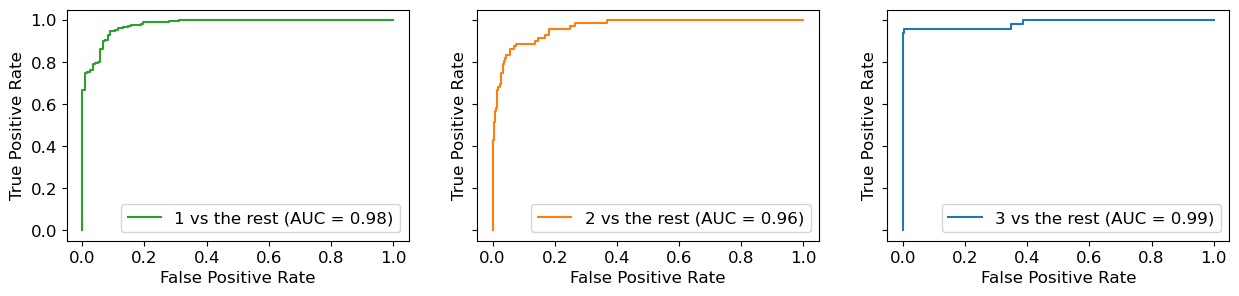

In [480]:
roc_curve(y_resampled,X_test,y_test,gbc_r)

## Results and Analysis

All four algorithms performed well in classifying the Cardiotocogram data.  However, while KNN, FR, and SVM scored simililarly, Gradient Boosting made a increase in classification performance.  Below is a box and whiskers plot of the f-scores derived from 5-fold cross validation.  During the cross validation there was an iterations in which the f-score was over .96.  The lowest iteration for Gradient Boosting was just about the highest for Random Forest. 

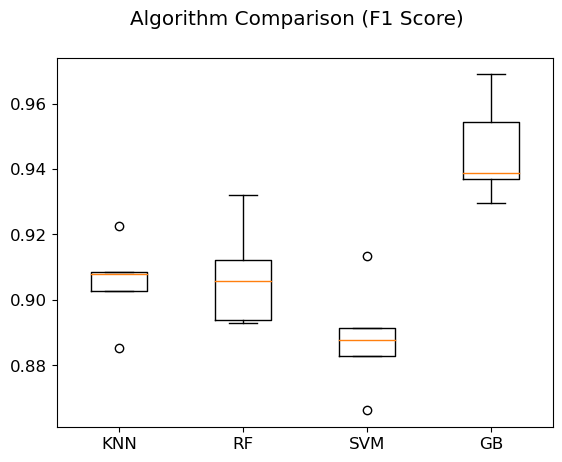

In [481]:
#  This code is partially derived from examples included here: https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

models = [('KNN', knn), ('RF', rf), ('SVM', svm), ('GB', gbc)]
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=5)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1_weighted')
    results.append(cv_results)
    names.append(name)

fig = plt.figure()
fig.suptitle('Algorithm Comparison (F1 Score)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Another measure to compare the algorithms is to look at the overall accuracy error rates between the four algorithms.  The error rate was cut in half for Gradient Boosting, comapred to the other three.  Resampling did little to improve performance.  The only algorithm which marginally benefitted from oversampling the minority classes was the Random Forest.  The other stayed the same or performced worse (SVM).   

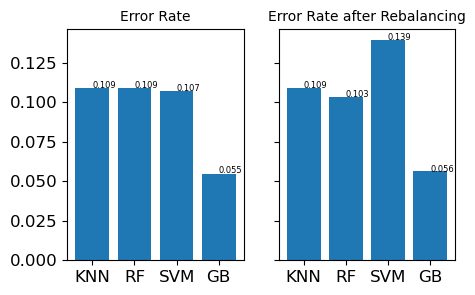

In [375]:
fig, ax = plt.subplots(1,2, figsize=(5, 3), sharex=True, sharey=True)

names = ['KNN','RF','SVM','GB']
error = [1 - accuracy_score(y_test, knn.predict(X_test)), 
         1 - accuracy_score(y_test, rf.predict(X_test)), 
         1 - accuracy_score(y_test, svm.predict(X_test)), 
         1 - accuracy_score(y_test, gbc.predict(X_test))]

error_r = [1 - accuracy_score(y_test, knn_r.predict(X_test)), 
         1 - accuracy_score(y_test, rf_r.predict(X_test)), 
         1 - accuracy_score(y_test, svm_r.predict(X_test)), 
         1 - accuracy_score(y_test, gbc_r.predict(X_test))]

ax[0].set_title('Error Rate', fontsize=10)
ax[1].set_title('Error Rate after Rebalancing', fontsize=10)
ax[0].bar(names, error)
ax[1].bar(names, error_r)

error = np.around(error,3)
error_r = np.around(error_r,3)

for index in range(len(error)):
  ax[0].text(names[index], error[index], error[index], size=6)
for index in range(len(error_r)):
  ax[1].text(names[index], error_r[index], error_r[index], size=6)


The weighted average Area Under the Curve also shows that Gradient Boosting performed the strongest.  However, with this metric, Random Forest and Support Vector Machines were similar.  

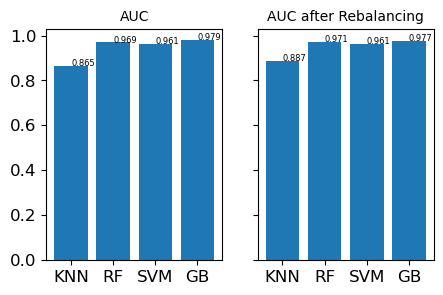

In [482]:
models = [knn, rf, svm, gbc]
models_r = [knn_r, rf_r, svm_r, gbc_r]
names = ['KNN','RF','SVM','GB']
AUC = []
AUC_r = []

for model in models:
    AUC.append(roc_auc_score(y_test,model.predict_proba(X_test),multi_class="ovr",average="weighted"))
for model in models_r:
    AUC_r.append(roc_auc_score(y_test,model.predict_proba(X_test),multi_class="ovr",average="weighted"))

fig, ax = plt.subplots(1,2, figsize=(5, 3), sharex=True, sharey=True)
    
ax[0].set_title('AUC', fontsize=10)
ax[1].set_title('AUC after Rebalancing', fontsize=10)
ax[0].bar(names, AUC)
ax[1].bar(names, AUC_r)

AUC = np.around(AUC,3)
AUC_r = np.around(AUC_r,3)

for index in range(len(AUC)):
  ax[0].text(names[index], AUC[index], AUC[index], size=6)
for index in range(len(AUC_r)):
  ax[1].text(names[index], AUC_r[index], AUC_r[index], size=6)

## Discussion and Conclusion

This project endeavored to apply machine learning algorithms to a dataset of fetal health data.  Using K-Nearest Neighbors, Random Forest, Support Vector Machines, and Gradient Boosting algorithms, an iterative process was undertaken to determine the best method to appropriately predict classifications.  While all four algorithms performed well in this task, Gradient Boosting achieved the highest marks.  Random Forest performed second best, while the K-Nearest Neighbors and Support Vector Machine algorithms performed least successfully.  

The confusion matrix for Gradient Boosting demonstrates its success.  Out of 410 Normal pregnancies, only 9 were mislabeled.  Out of 72 Suspect pregnancies 17 were mislabeled, and of 50 Pathologic pregnancies, only three were mislabled.  In general across the algorithms, the Suspect values were the most difficult to classify.  

I learned much from this project.  First my assumptions were challenged regarding the need to oversample minority classes of data.  None of the four algorithms improved much by oversampling data, and in one case, the results deteriorated.  

I also learned to trust the use of grid search.  Instead of manually searching for the best hyperparameters for these models, it was easiest to just iterate through a selection of values using cross validation.  The use of cross validation helped to average out scores over a number of iterations.  This is important, because when searching for parameters on my own, I often found better performance for a given parameter on a given test data set.  If I had trusted that alone, it is likely that overall performance would have been lower.  Cross validation can make sure that parameters are best overall.  

As I reflect on these results, I might attempt to use k-fold cross validation to measure algorithm success in future projects.  Segmenting the data into train and test segments is a valid approach.  However, using cross validation I would have had more data to train on, and the results would have been averaged over a number of iterations.  Since this was a relatively small dataset (just over 2,000 objects), training would have benefitted from using all of the data.  Instead, only 75% of the data was used for training.  Also the Algorithm Comparison plot above shows how much difference there is within iterations of cross validation.  My test data might be a poor selection of the data overall.  Therefore, cross validation could help ensure that the results are valid.  

In this project I also learned to trust F-scores and the Area Under the Curve measure.  When you have imbalanced data, then you need to have a good measure of overall performance across the classes.  You don't want to just see that your model is predicting the dominant class well.  The ROC Curves, AUC, and F-scores ensured that we are able to see the performance on the minority classes as well.  

One thing that I was confused about in this project was why removing correlated features did not improve Support Vector Machines.  In retrospect, I should have used to the VIF test to see whether given features were truly collinear.  By removing the features that I did, I was likely removing features that were significant to the model.  

I was also fortunate in this project that the dataset size was relatively small.  Gradient Boosting with 1000 iterations might not have been possible on my current hardware.  While Gradient Boosting achieved the best performance, it also took the longest to train.  That is something to keep in mind in future projects.  There needs to be a tradeoff between training time and performance.  

Overall, if one can easily identify whether certain Cardiotocogram data indicates an unhealthy fetus, then one can intervene quickly to treat the underlying illnesses and increase the chances of a healthy delivery. From this investigation, it is clear to me that a classifier based on the Gradient Boosting can ensure that good predictions are made about whether medical intervention is needed during a pregnancy.  